# Brandan Keen

# MET3601 Assignment #7

This assignment can be completed by adding code to this notebook for each question.

Turn in a completed script, renamed as

`assignment7_lastname.ipynb`

via JupyterHub and Canvas. 

**DUE DATE: 11 November 2024 at 11 a.m.**

Prior to turning in your script, please cleanup and comment your code for each problem. Be sure that your output is self-describing.

**Background**

Soundings and the parameters that can be calculated from them are
essential tools that meteorologists use on a daily basis. While it is
relatively easy to calculate some of these parameters by hand, it is
helpful to have predefined functions that can make easy work of doing
these calculations for any number of soundings. Additionally, it is
useful to automate the plotting of temperature, dewpoint, and wind speed
and direction on a skew-T diagram, so that a high-quality visualization
can be produced quickly and on-demand. This assignment will slowly build
a single program to calculate a number of variables and produce
high-quality output to an end user.

In [1]:
Commandline Input Example:
```
>>> Input Location: SGF
>>> Input Date/Time (YYYYMMDDHH): 2004061212
```
Text Output From Program:
```
SGF Observations at 12Z 12 Jun 2004
---------------------------------------------------
 PRES    TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA
 hPa      C     C     %     g/kg  deg   knot   K
---------------------------------------------------
986.0   22.4   21.2  92.9  16.60  200     5   298.3
948.0   23.6   21.1  85.9  16.85  229    23   301.3

.
.
.
.
.
.

  4.8  -23.3  -57.3   2.8   3.46   63    35  1148.1
  4.7  -24.0  -57.6   2.9   3.41   59    35  1151.8

Station Information and sounding indices

Station identifier: SGF
Observation time: 040612/1200
Lifted Index: -5.77 C
Total Totals Index: 54.2
SBCAPE: 1883.7 J/kg
SBCIN: -87.1 J/kg
LCL: 951 hPa
LFC: 801 hPa
EL: 207 hPa

WARNING: SEVERE THUNDERSTORMS ARE POSSIBLE!

>>>
```

SyntaxError: invalid decimal literal (188408681.py, line 8)

In [1]:
# Importing Packages
from datetime import datetime

import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import units, pandas_dataframe_to_unit_arrays
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir 

## Question #1

Write a short script that reads in a sounding data file from the
Wyoming sounding archive and print the <u>raw data</u> to standard output. (5 points) 
The program input should be the sounding location (three-letter
identifier) and date/time in YYYYMMDDHH.

Program Input: Sounding Location and Date/Time

Program Output: Sounding Text File **(\<station
ID\>\_YYYYMMDD\_HH.txt**) and Skew-T Image **(\<station
ID\>\_YYYYMMDD\_HH.png**)

Test Sounding Location: SGF

Test Sounding Date/Time: 2004061212

In [2]:
# Input Station ID and Date
station = input(' Input Location: ')
date = input(' Input Date/Time (YYYYMMDDHH): ')

# Parsing date string to datetime object
date = datetime.strptime(date,'%Y%m%d%H')

# Request data from Wyoming Upper Air archive
df = WyomingUpperAir.request_data(date, station)

#Printing raw data
print(df)

 Input Location:  SGF
 Input Date/Time (YYYYMMDDHH):  2004061212


    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0      968.0     387         22.4      21.2      200.0    5.0   1.710101   
1      948.0     572         23.6      21.1      229.0   23.0  17.358320   
2      943.9     610         23.4      20.9      235.0   27.0  22.117105   
3      925.0     789         22.4      20.0      240.0   27.0  23.382686   
4      911.8     914         21.7      19.4      250.0   25.0  23.492316   
..       ...     ...          ...       ...        ...    ...        ...   
84       5.8   35052        -32.8     -63.4       90.0   33.0 -33.000000   
85       5.0   36120        -25.1     -58.1       70.0   34.0 -31.949549   
86       4.8   36418        -23.3     -57.3       63.0   35.0 -31.185228   
87       4.7   36576        -24.0     -57.6       60.0   35.0 -30.310889   
88       4.5   36889        -25.3     -58.3        NaN    NaN        NaN   

          v_wind station  station_number                time  latitude  \
0   4.698463e

## Question #2
Calculate the following variables for each level in the sounding and
create well formatted output saved to a file similar in style to that of the Wyoming
site including all appropriate variables (10 points) :

- Potential Temperature
- Mixing Ratio
- Relative Humidity
- Wind Speed
- Wind Direction

> Note: Utilize your resources well. These can all be calculated easily
> using the MetPy module.

In [3]:

data_with_units = pandas_dataframe_to_unit_arrays(df)

# Filter for pressure from surface to 100 hPa
ip100 = data_with_units['pressure'] >= 100 * units.hPa

# Filter for lowest 6 km heights
lowest6km = data_with_units['height']<= 6000 * units.meter

# Defining variables
station_number = df['station_number'][0]
pressure = data_with_units['pressure'][ip100]
temperature = data_with_units['temperature'][ip100]
dewpoint = data_with_units['dewpoint'][ip100]
u_wind = data_with_units['u_wind'][ip100]
v_wind = data_with_units['v_wind'][ip100]
height = data_with_units['height'][ip100]
height_6km = data_with_units['height'][lowest6km]
u_wind_6km,v_wind_6km = data_with_units['u_wind'][lowest6km],data_with_units['v_wind'][lowest6km]

# Calculating relative humidity
relh = mpcalc.relative_humidity_from_dewpoint(temperature, dewpoint)

# Calculating mixing ratio 
mixing_ratio = mpcalc.mixing_ratio_from_relative_humidity(pressure,temperature,relh)

# Calculating wind speed and direction from u and v components
wind_speed = mpcalc.wind_speed(u_wind, v_wind)#.to('knots')
wind_direction = mpcalc.wind_direction(u_wind, v_wind)

# Calculating potential temperature
theta = mpcalc.potential_temperature(pressure, temperature)

# Thank you DRL!! 
print(f'K{station} Observations at {date:%HZ %d %B %Y}')
print('-------------------------------------------------')
print('  PRES  TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA ')
print('  hPa   °C     °C     %     g/kg   deg  knot   K   ')
print('-------------------------------------------------')
for i in np.arange(pressure.shape[0]):
    
    print(f'{pressure[i].m:6.1f} {temperature[i].m:5.1f} {dewpoint[i].m:5.1f} {relh[i].to("percent").m:5.1f} '
          f'{mixing_ratio[i].to("g/kg").m:6.1f} {wind_direction[i].m:5.0f}'
          f'{wind_speed[i].m:5.0f} {theta[i].m:6.1f}')

KSGF Observations at 12Z 12 June 2004
-------------------------------------------------
  PRES  TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA 
  hPa   °C     °C     %     g/kg   deg  knot   K   
-------------------------------------------------
 968.0  22.4  21.2  92.9   16.6   200    5  298.3
 948.0  23.6  21.1  85.9   16.9   229   23  301.3
 943.9  23.4  20.9  85.9   16.7   235   27  301.5
 925.0  22.4  20.0  86.3   16.1   240   27  302.2
 911.8  21.7  19.4  86.8   15.7   250   25  302.7
 880.2  20.1  17.9  87.2   14.8   255   22  304.1
 850.0  18.4  16.4  88.1   13.9   265   18  305.4
 819.8  16.2  14.4  89.1   12.7   275   16  306.3
 790.9  14.0  12.4  90.1   11.5   280   15  307.1
 763.1  11.8  10.4  91.1   10.4   270   15  307.8
 756.0  11.2   9.9  91.7   10.2   261   14  308.0
 736.0  11.6   4.6  62.1    7.3   235   13  310.8
 735.9  11.6   4.6  62.1    7.3   235   13  310.8
 709.4   9.4   3.1  64.7    6.8   195   15  311.7
 700.0   8.6   2.6  66.0    6.6   195   15  312.0
 692.0   

## Question #3
Calculate the following levels for a surface-based parcel path and
add to the text output of problem 2 (10 points) :
- Lifting Condensation Level
- Level of Free Convection
- Equilibrium Level
- Lifted Index
- Total Totals Index
- SBCAPE
- SBCIN

> Note: Utilize your resources well. These can all be calculated easily using the MetPy module.
> https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html#module-metpy.calc

In [4]:
# Calculating sounding indices

# Defining surface values for pressure, temperature, and dewpoint
surface_pressure = pressure[0]
surface_temperature = temperature[0]
surface_dewpoint = dewpoint[0]

# Lifting Condensation Level (LCL) for surface-based parcel
lcl_pressure, lcl_temperature = mpcalc.lcl(surface_pressure, surface_temperature, surface_dewpoint)

# Surface-based parcel path
parcel_profile = mpcalc.parcel_profile(pressure, surface_temperature, surface_dewpoint).to('degC')

# Level of Free Convection (LFC)
lfc_pressure,lfc_temperature = mpcalc.lfc(pressure, temperature, dewpoint)

# Equilibrium Level (EL)
el_pressure,el_temperature = mpcalc.el(pressure, temperature, dewpoint,parcel_profile)

# Lifted Index (LI)
lifted_index = mpcalc.lifted_index(pressure, temperature, parcel_profile)

# Total Totals Index
total_totals_index = mpcalc.total_totals_index(pressure, temperature, dewpoint)

# Surface-based CAPE (SBCAPE) and CIN (SBCIN)
sbcape, sbcin = mpcalc.surface_based_cape_cin(pressure, temperature, dewpoint)

# Adding sounding indices to the end of previous output
print(f'K{station} Observations at {date:%HZ %d %B %Y}')
print('-------------------------------------------------')
print('  PRES  TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA ')
print('  hPa    °C     °C     %     g/kg   deg  knot   K   ')
print('-------------------------------------------------')
for i in np.arange(pressure.shape[0]):
    
    print(f'{pressure[i].m:6.1f} {temperature[i].m:5.1f} {dewpoint[i].m:5.1f} {relh[i].to("percent").m:5.1f} '
          f'{mixing_ratio[i].to("g/kg").m:6.1f} {wind_direction[i].m:5.0f}'
          f'{wind_speed[i].m:5.0f} {theta[i].m:6.1f}')
print('\nSounding Indices:\n--------------------------')
print(f'LCL: {lcl_pressure.m:.2f} hPa')
print(f'LFC: {lfc_pressure.m:.2f} hPa')
print(f'EL: {el_pressure.m:.2f} hPa')
print(f'Lifted Index:{lifted_index[0].m:.2f} ∆°C')
print(f'Total Totals Index: {total_totals_index.m:.2f}')
print(f'SBCAPE: {sbcape.m:.2f} J·kg⁻¹')
print(f'SBCIN: {sbcin.m:.2f} J·kg⁻¹')

KSGF Observations at 12Z 12 June 2004
-------------------------------------------------
  PRES  TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA 
  hPa    °C     °C     %     g/kg   deg  knot   K   
-------------------------------------------------
 968.0  22.4  21.2  92.9   16.6   200    5  298.3
 948.0  23.6  21.1  85.9   16.9   229   23  301.3
 943.9  23.4  20.9  85.9   16.7   235   27  301.5
 925.0  22.4  20.0  86.3   16.1   240   27  302.2
 911.8  21.7  19.4  86.8   15.7   250   25  302.7
 880.2  20.1  17.9  87.2   14.8   255   22  304.1
 850.0  18.4  16.4  88.1   13.9   265   18  305.4
 819.8  16.2  14.4  89.1   12.7   275   16  306.3
 790.9  14.0  12.4  90.1   11.5   280   15  307.1
 763.1  11.8  10.4  91.1   10.4   270   15  307.8
 756.0  11.2   9.9  91.7   10.2   261   14  308.0
 736.0  11.6   4.6  62.1    7.3   235   13  310.8
 735.9  11.6   4.6  62.1    7.3   235   13  310.8
 709.4   9.4   3.1  64.7    6.8   195   15  311.7
 700.0   8.6   2.6  66.0    6.6   195   15  312.0
 692.0  

In [5]:
# Naming output file
file_name = f'{station}_{date:%Y%m%d_%H}.txt'

# Opening file
file = open(file_name, 'w')

# Writing the header with station and date information
file.write(f'K{station} Observations at {date:%HZ %d %B %Y}\n')
file.write('-------------------------------------------------\n')
file.write('  PRES  TEMP  DWPT  RELH   MIXR  DRCT  SKNT  THTA \n')
file.write('  hPa    C     C     %     g/kg   deg  knot   K   \n')
file.write('-------------------------------------------------\n')

# Writing sounding data
for i in np.arange(pressure.shape[0]):
    file.write(f'{pressure[i].m:6.1f} {temperature[i].m:5.1f} {dewpoint[i].m:5.1f} '
               f'{relh[i].to("percent").m:5.1f} {mixing_ratio[i].to("g/kg").m:6.1f} '
               f'{wind_direction[i].m:5.0f} {wind_speed[i].m:5.0f} {theta[i].m:6.1f}\n')

# Writing sounding indices
file.write('\n\nSounding Indices:\n--------------------------\n')
file.write(f'LCL: {lcl_pressure.m:.2f} hPa\n')
file.write(f'LCL Temperature: {lcl_temperature.m:.2f} °C\n')
file.write(f'LFC: {lfc_pressure.m:.2f} hPa\n')
file.write(f'EL: {el_pressure.m:.2f} hPa\n')
file.write(f'Lifted Index: {lifted_index[0].m:.2f} ∆°C\n')
file.write(f'Total Totals Index: {total_totals_index.m:.2f}\n')
file.write(f'SBCAPE: {sbcape.m:.2f} J·kg⁻¹\n')
file.write(f'SBCIN: {sbcin.m:.2f} J·kg⁻¹\n')

# Closing file
file.close()

## Question #4
Plot the sounding on a skew-T using Python and include the
surfaced-based parcel profile (10 points) .
- Plot an appropriate title on the skew-T with the station ID, date and time of the launch
- Plot markers and text to identify the location of the LCL, LFC, and EL.
    
> Note: Utilize the temperature and pressure values from finding the levels to help you plot the marker and text in the correct location.
    

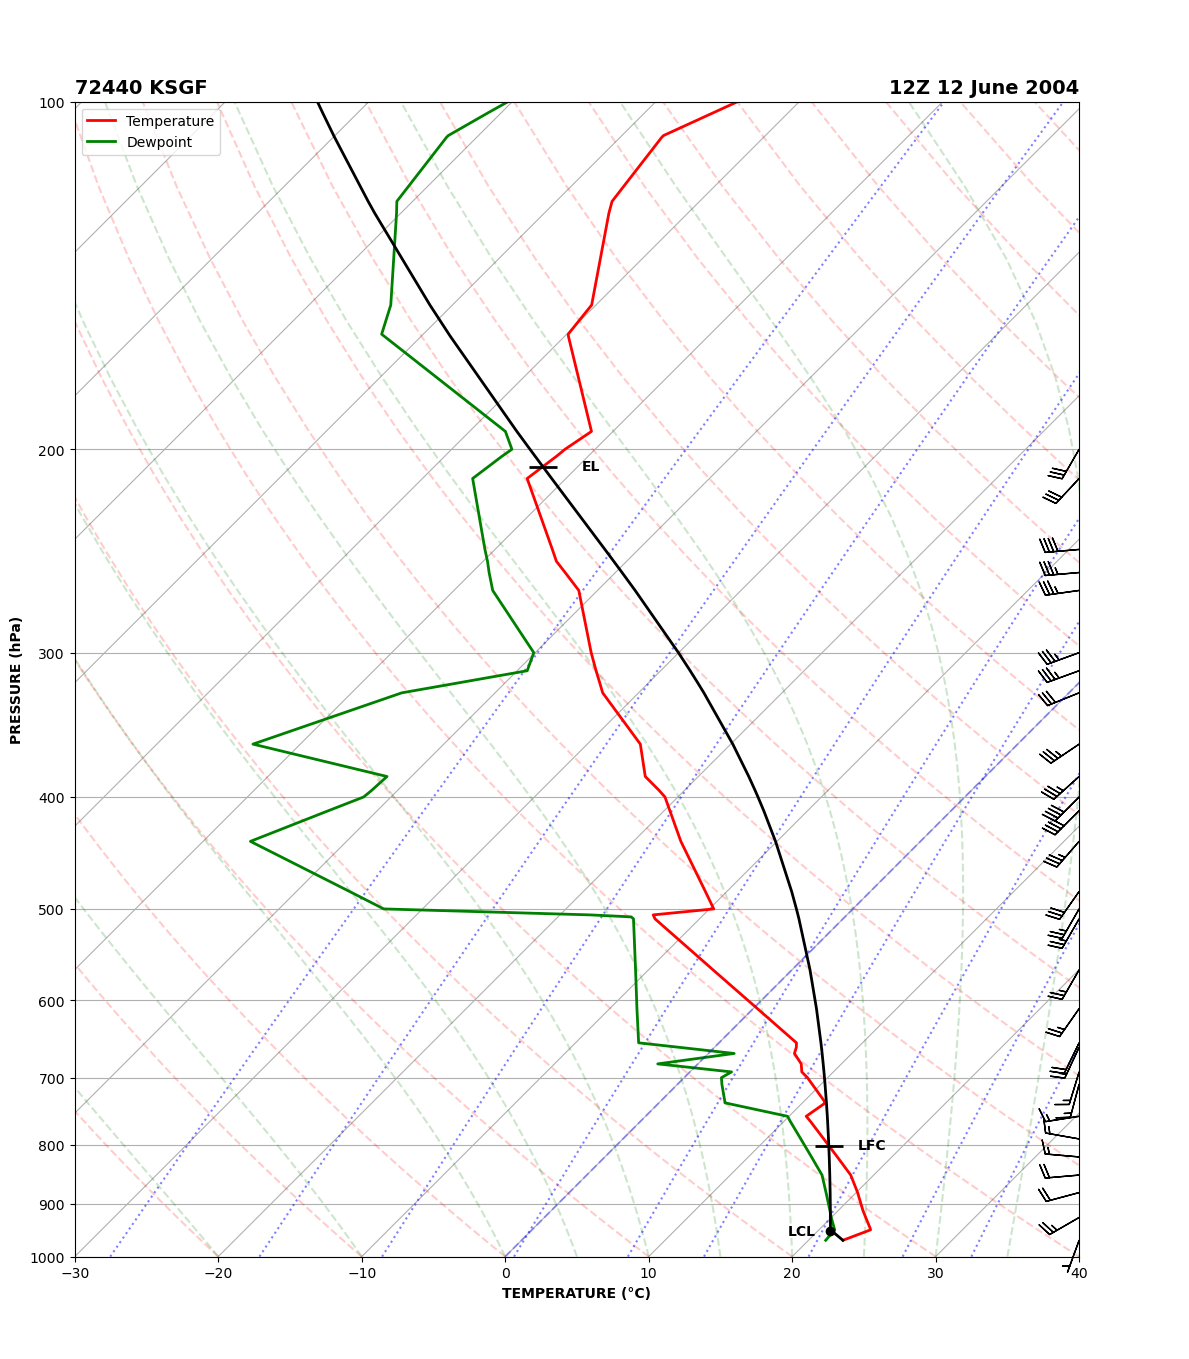

In [6]:

# Creating the figure and Skew-T
fig = plt.figure(figsize=(15, 15))
skew = SkewT(fig, rotation=45)

# Setting axis limits and labeling
skew.ax.set_ylim(1000,100)
skew.ax.set_xlim(-30,40)
skew.ax.set_xlabel("TEMPERATURE (°C)", weight='bold')
skew.ax.set_ylabel("PRESSURE (hPa)", weight='bold')

# Plotting temperature and dewpoint
skew.plot(pressure, temperature, 'r', linewidth=2, label='Temperature')
skew.plot(pressure, dewpoint, 'g', linewidth=2, label='Dewpoint')

# Resampling wind barbs to clean up output
# Code adapted from: https://unidata.github.io/MetPy/latest/examples/Advanced_Sounding_With_Complex_Layout.html 
interval = np.logspace(np.log10(200), np.log10(1000), 40) * units.hPa
idx = mpcalc.resample_nn_1d(pressure, interval)

# Plotting wind barbs
skew.plot_barbs(pressure=pressure[idx], u=u_wind[idx], v=v_wind[idx])

# Adding dry adiabats, moist adiabats, and mixing ratio lines
skew.plot_dry_adiabats(t0=np.arange(-60,240,10)*units.degC,color='darkorange',alpha=0.2)
skew.plot_moist_adiabats(colors='green', alpha=0.2)
skew.plot_mixing_lines(pressure=np.arange(1000,99,-20)*units.hPa,linestyle='dotted',
                      colors = 'blue',alpha=0.5)

# Enhancing 0°C Isotherm
skew.ax.axvline(0, linestyle='--', color='blue', alpha=0.3) 




# Plotting parcel profile and markers for LCL, LFC, and EL
skew.plot(pressure, parcel_profile, color='black', linewidth=2)
skew.plot(lcl_pressure, lcl_temperature, color='black', marker='o', markerfacecolor='black')
skew.plot(lfc_pressure, lfc_temperature, '_', markersize = 20,markeredgewidth=2, 
           markeredgecolor='black',markerfacecolor='black')
skew.plot(el_pressure, el_temperature, '_', markersize = 20,markeredgewidth=2, 
           markeredgecolor='black',markerfacecolor='black')

# Creating offsets from markers for text
lcl_offset,lfc_offset,el_offset = -3,+4,+4

# Plotting text for LCL, LFC, EL markers
skew.ax.text(lcl_temperature.m + lcl_offset , lcl_pressure, 'LCL', fontweight='bold', ha='left',va='center')
skew.ax.text(lfc_temperature.m + lfc_offset , lfc_pressure, 'LFC', fontweight='bold', ha='right',va='center')
skew.ax.text(el_temperature.m + el_offset , el_pressure, 'EL', fontweight='bold', ha='right',va='center')

# Adding legend
plt.legend(loc='upper left')

# Setting title using the date and station variables
plt.title(f'{date:%HZ %d %B %Y}', fontsize=14, weight='bold',loc='right')
plt.title(f'{station_number} K{station}', fontsize=14, weight='bold',loc='left')

plt.show()


## Question #5
Shade the CAPE and CIN area on the plot you created in question #4 (5 points).

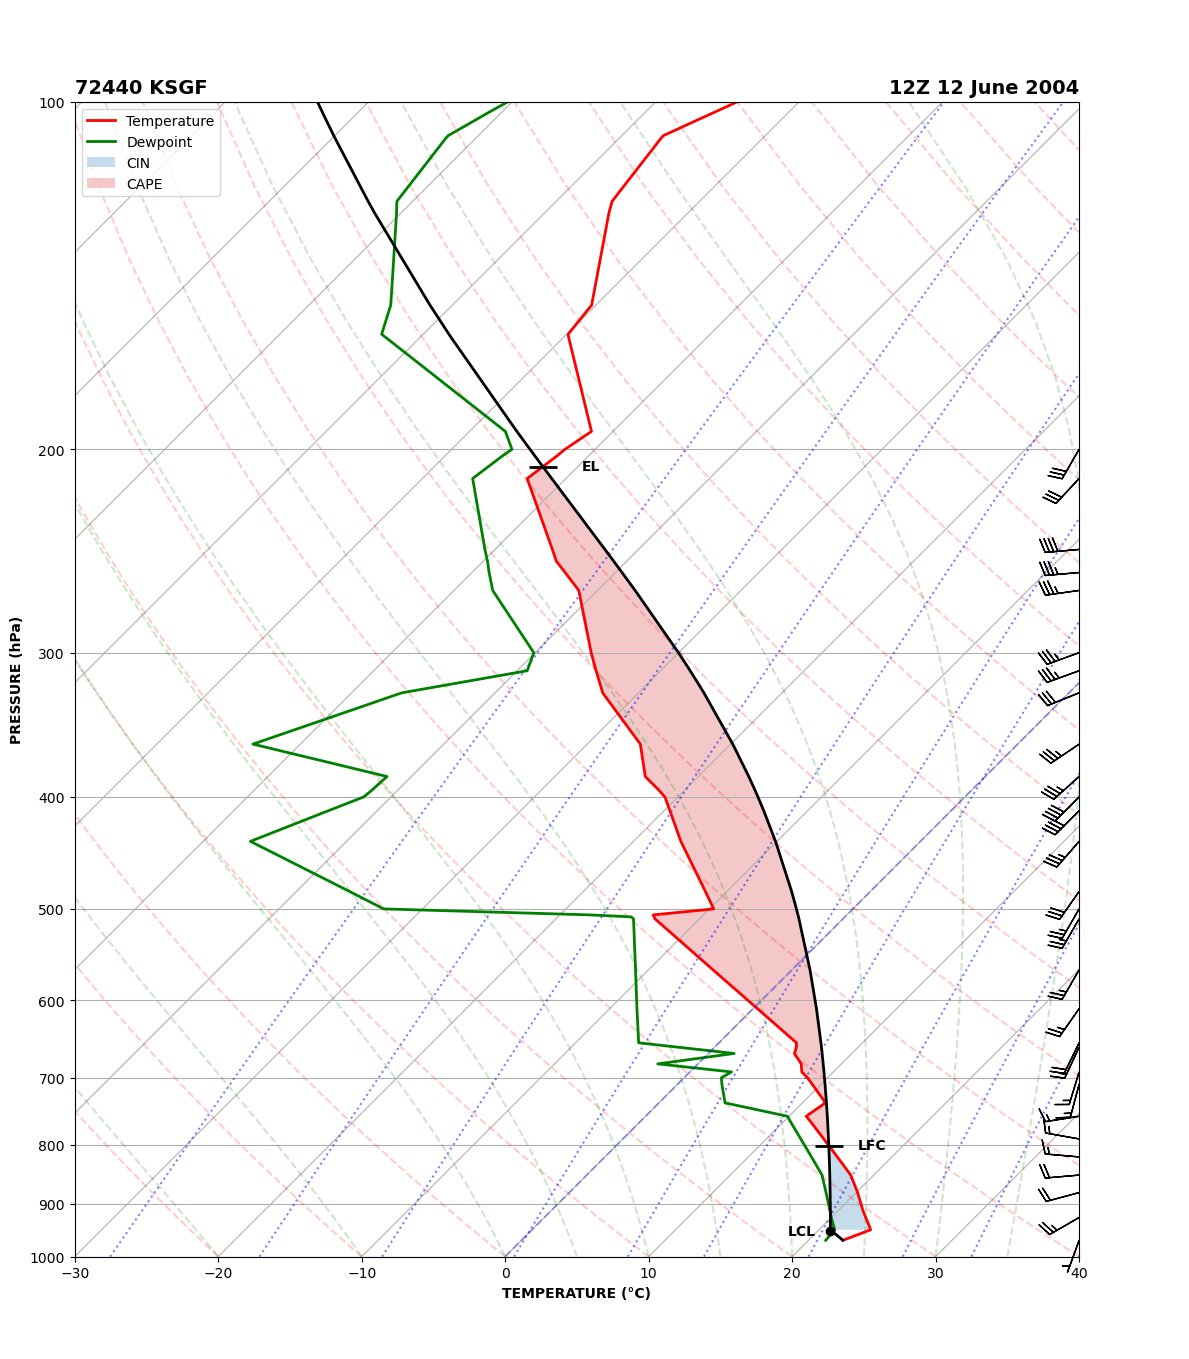

In [7]:

# Creating the figure and Skew-T
fig = plt.figure(figsize=(15, 15))
skew = SkewT(fig, rotation=45)

# Setting axis limits and labeling
skew.ax.set_ylim(1000,100)
skew.ax.set_xlim(-30,40)
skew.ax.set_xlabel("TEMPERATURE (°C)", weight='bold')
skew.ax.set_ylabel("PRESSURE (hPa)", weight='bold')

# Plotting temperature and dewpoint
skew.plot(pressure, temperature, 'r', linewidth=2, label='Temperature')
skew.plot(pressure, dewpoint, 'g', linewidth=2, label='Dewpoint')

# Resampling wind barbs to clean up output
# Code adapted from: https://unidata.github.io/MetPy/latest/examples/Advanced_Sounding_With_Complex_Layout.html 
interval = np.logspace(np.log10(200), np.log10(1000), 40) * units.hPa
idx = mpcalc.resample_nn_1d(pressure, interval)

# Plotting wind barbs
skew.plot_barbs(pressure=pressure[idx], u=u_wind[idx], v=v_wind[idx])

# Adding dry adiabats, moist adiabats, and mixing ratio lines
skew.plot_dry_adiabats(t0=np.arange(-60,240,10)*units.degC,color='darkorange',alpha=0.2)
skew.plot_moist_adiabats(colors='green', alpha=0.2)
skew.plot_mixing_lines(pressure=np.arange(1000,99,-20)*units.hPa,linestyle='dotted',
                      colors = 'blue',alpha=0.5)

# Enhancing 0°C Isotherm
skew.ax.axvline(0, linestyle='--', color='blue', alpha=0.3) 




# Plotting parcel profile and markers for LCL, LFC, and EL
skew.plot(pressure, parcel_profile, color='black', linewidth=2)
skew.plot(lcl_pressure, lcl_temperature, color='black', marker='o', markerfacecolor='black')
skew.plot(lfc_pressure, lfc_temperature, '_', markersize = 20,markeredgewidth=2, 
           markeredgecolor='black',markerfacecolor='black')
skew.plot(el_pressure, el_temperature, '_', markersize = 20,markeredgewidth=2, 
           markeredgecolor='black',markerfacecolor='black')

# Creating offsets from markers for text
lcl_offset,lfc_offset,el_offset = -3,+4,+4

# Plotting text for LCL, LFC, EL markers
skew.ax.text(lcl_temperature.m + lcl_offset , lcl_pressure, 'LCL', fontweight='bold', ha='left',va='center')
skew.ax.text(lfc_temperature.m + lfc_offset , lfc_pressure, 'LFC', fontweight='bold', ha='right',va='center')
skew.ax.text(el_temperature.m + el_offset , el_pressure, 'EL', fontweight='bold', ha='right',va='center')


# Shading areas of CAPE and CIN
skew.shade_cin(pressure, temperature, parcel_profile, dewpoint, alpha=0.25, label='CIN')
skew.shade_cape(pressure, temperature, parcel_profile, alpha=0.25, label='CAPE')

# Adding legend
plt.legend(loc='upper left')

# Setting title using the date and station variables
plt.title(f'{date:%HZ %d %B %Y}', fontsize=14, weight='bold',loc='right')
plt.title(f'{station_number} K{station}', fontsize=14, weight='bold',loc='left')

plt.show()


## Question #6
Plot a hodograph of the <u>lowest 6 km</u> of the atmosphere somewhere on your skew-T diagram that you created in question #4 (5 points).

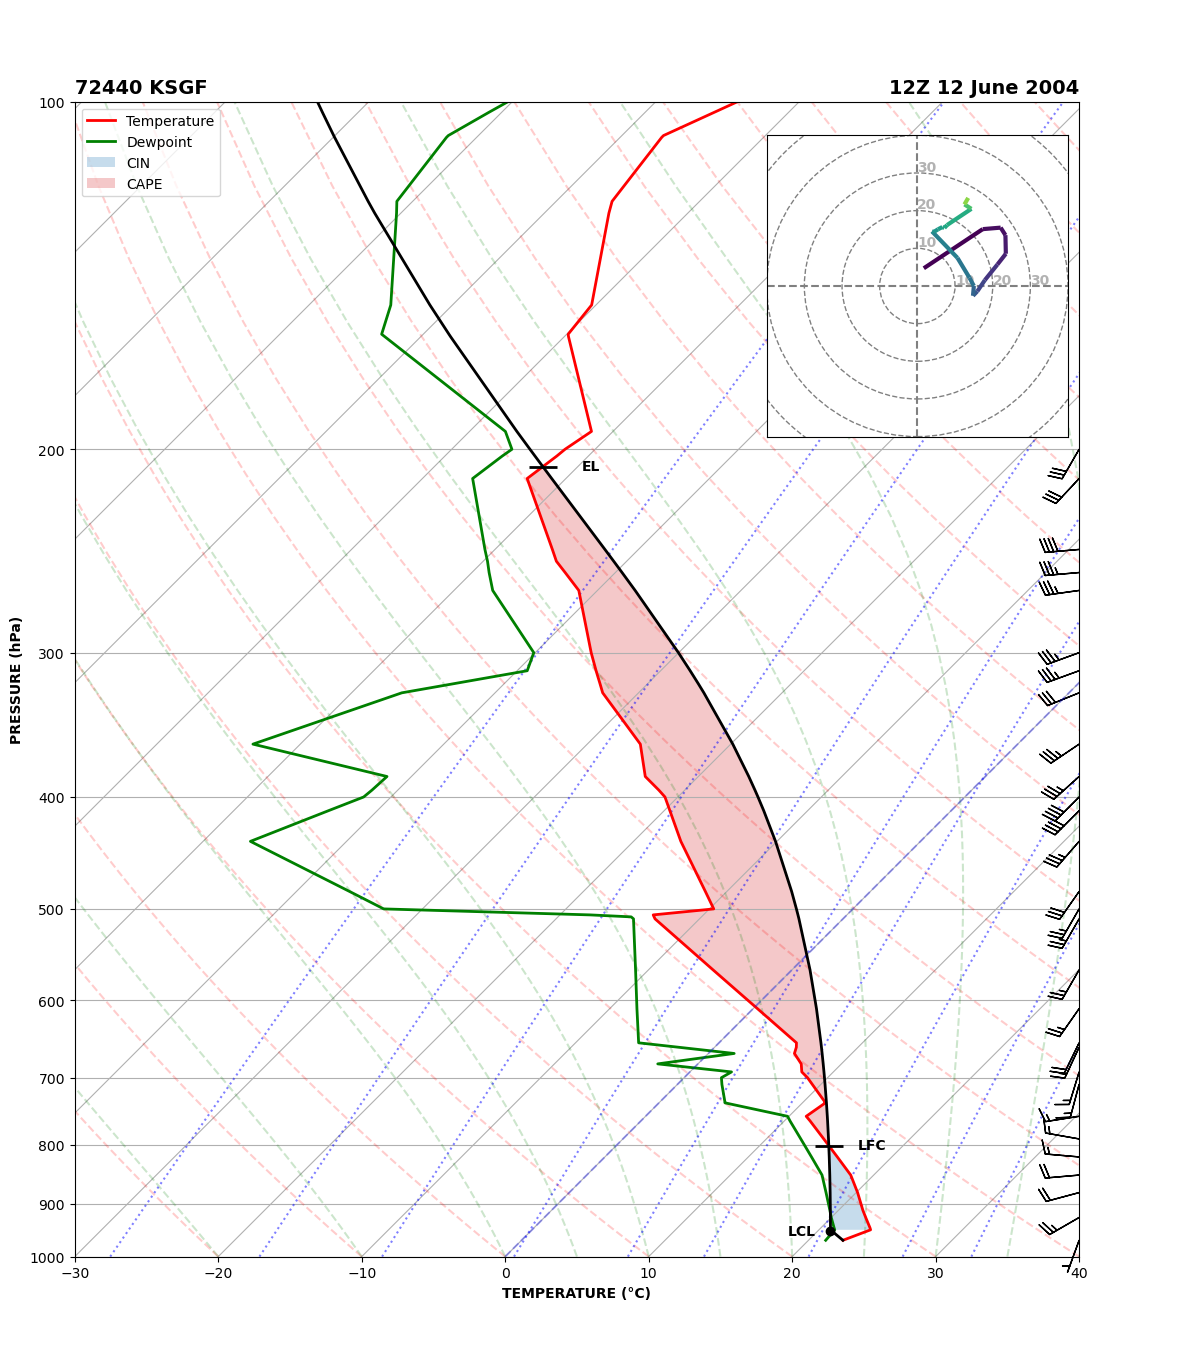

In [15]:

# Creating the figure and Skew-T
fig = plt.figure(figsize=(15, 15))
skew = SkewT(fig, rotation=45)

# Setting axis limits and labeling
skew.ax.set_ylim(1000,100)
skew.ax.set_xlim(-30,40)
skew.ax.set_xlabel("TEMPERATURE (°C)", weight='bold')
skew.ax.set_ylabel("PRESSURE (hPa)", weight='bold')

# Plotting temperature and dewpoint
skew.plot(pressure, temperature, 'r', linewidth=2, label='Temperature')
skew.plot(pressure, dewpoint, 'g', linewidth=2, label='Dewpoint')

# Resampling wind barbs to clean up output
# Code adapted from: https://unidata.github.io/MetPy/latest/examples/Advanced_Sounding_With_Complex_Layout.html 
interval = np.logspace(np.log10(200), np.log10(1000), 40) * units.hPa
idx = mpcalc.resample_nn_1d(pressure, interval)

# Plotting wind barbs
skew.plot_barbs(pressure=pressure[idx], u=u_wind[idx], v=v_wind[idx])

# Adding dry adiabats, moist adiabats, and mixing ratio lines
skew.plot_dry_adiabats(t0=np.arange(-60,240,10)*units.degC,color='darkorange',alpha=0.2)
skew.plot_moist_adiabats(colors='green', alpha=0.2)
skew.plot_mixing_lines(pressure=np.arange(1000,99,-20)*units.hPa,linestyle='dotted',
                      colors = 'blue',alpha=0.5)

# Enhancing 0°C Isotherm
skew.ax.axvline(0, linestyle='--', color='blue', alpha=0.3) 




# Plotting parcel profile and markers for LCL, LFC, and EL
skew.plot(pressure, parcel_profile, color='black', linewidth=2)
skew.plot(lcl_pressure, lcl_temperature, color='black', marker='o', markerfacecolor='black')
skew.plot(lfc_pressure, lfc_temperature, '_', markersize = 20,markeredgewidth=2, 
           markeredgecolor='black',markerfacecolor='black')
skew.plot(el_pressure, el_temperature, '_', markersize = 20,markeredgewidth=2, 
           markeredgecolor='black',markerfacecolor='black')

# Creating offsets from markers for text
lcl_offset,lfc_offset,el_offset = -3,+4,+4

# Plotting text for LCL, LFC, EL markers
skew.ax.text(lcl_temperature.m + lcl_offset , lcl_pressure, 'LCL', fontweight='bold', ha='left',va='center')
skew.ax.text(lfc_temperature.m + lfc_offset , lfc_pressure, 'LFC', fontweight='bold', ha='right',va='center')
skew.ax.text(el_temperature.m + el_offset , el_pressure, 'EL', fontweight='bold', ha='right',va='center')


# Shading areas of CAPE and CIN
skew.shade_cin(pressure, temperature, parcel_profile, dewpoint, alpha=0.25, label='CIN')
skew.shade_cape(pressure, temperature, parcel_profile, alpha=0.25, label='CAPE')

# Adding legend
plt.legend(loc='upper left')

# Setting title using the date and station variables
plt.title(f'{date:%HZ %d %B %Y}', fontsize=14, weight='bold',loc='right')
plt.title(f'{station_number} K{station}', fontsize=14, weight='bold',loc='left')

# Adding Hodograph for lowest 6km wind
ax_hodo = inset_axes(skew.ax,'30%','30%', loc=1, borderpad=0.8)
h = Hodograph(ax_hodo,component_range= 40)
h.add_grid(increment = 10)

# Removing tick marks, labels, and axis labels
# Code from source: https://unidata.github.io/MetPy/latest/examples/Advanced_Sounding_With_Complex_Layout.html 
h.ax.set_box_aspect(1)
h.ax.set_yticklabels([])
h.ax.set_xticklabels([])
h.ax.set_xticks([])
h.ax.set_yticks([])
h.ax.set_xlabel(' ')
h.ax.set_ylabel(' ')

# Adding internal tick marks
# Code from source: https://unidata.github.io/MetPy/latest/examples/Advanced_Sounding_With_Complex_Layout.html
for i in range(10, 120, 10):
    h.ax.annotate(str(i), (i, 0), xytext=(0, 2), textcoords='offset pixels',
              clip_on=True, fontsize=10, weight='bold', alpha=0.3, zorder=0)
    h.ax.annotate(str(i), (0, i), xytext=(0, 2), textcoords='offset pixels',
                  clip_on=True, fontsize=10, weight='bold', alpha=0.3, zorder=0)

# Color mapping height
h.plot_colormapped(u_wind_6km,v_wind_6km,height_6km)
#h.plot_colormapped(u_wind,v_wind,height)

# Saving plot
plt.savefig(f'{station}_{date:%Y%m%d_%H}.png')
plt.show()


## Question #7
Have the program assess the likelihood of severe weather happening
as a result of a given sounding. Use the following critical values
for skew-T parameters to have the program make the determination if
severe weather is likely to occur or not. If at least two of the
parameters outlined below are satisfied, then severe weather is more
likely than not to occur if thunderstorms develop issue the
following statement, "WARNING: SEVERE THUNDERSTORMS ARE POSSIBLE!",
otherwise issue the following statement, "NOTE: Severe Thunderstorms
Not Likely To Occur." (5 points)

- CAPE >= 1500 J/kg
- CIN >= -125 J/kg
- LI <= -2 delta_degC

In [10]:
# Defining critical values
cape_threshold = 1500  # J·kg⁻¹
cin_threshold = -125   # J·kg⁻¹
li_threshold = -2      # ∆°C

# Varialbe to track critical values reached
thresholds_reached = 0

# Determing critcial values met
if sbcape.m >= 1500:
    thresholds_reached +=1
if sbcin.m >= -125:
    thresholds_reached +=1
if lifted_index.m <= -2:
    thresholds_reached +=1

# Issuing warning/note
if thresholds_reached >= 2:
    print('WARNING: SEVERE THUNDERSTORMS ARE POSSIBLE!')
else:
    print('NOTE: Severe Thunderstorms Not Likely To Occur.')